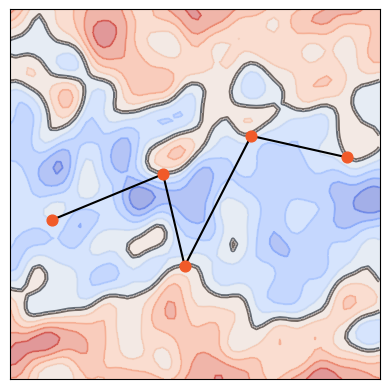

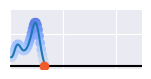

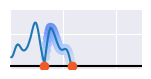

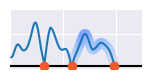

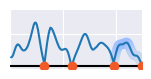

In [18]:
import os
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import cm

pts = (np.array([
    (0.2291, 1.1383),
    (0.8282, 0.8913),
    (0.9453 , 1.3886 ),
    (1.3047, 0.6843),
    (1.8209 , 0.8),
]) - 1) * np.array([1,-1])

# utils.plot_prior("testing/diadactic-fig/mean.bin", plt.gca())
# plt.savefig("figures/diadactic-fig-mean.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
# plt.show()

val_range = utils.plot_prior("testing/diadactic-fig/global-real.bin", plt.gca())
plt.plot(pts[:,0], pts[:,1], color="black")
plt.scatter(pts[:,0], pts[:,1], color=(241/255,90/255,41/255), zorder=10, s=60)
plt.savefig("figures/diadactic-fig-global.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.show()

max_t = np.fromfile(f"testing/diadactic-fig/ray-ts-{pts.shape[0]-1}.bin").max()
max_v = np.fromfile(f"testing/diadactic-fig/ray-values-{pts.shape[0]-1}.bin").max()

for i in range(1,pts.shape[0]):
    
    with plt.style.context("seaborn-v0_8-dark"):
        params = {'text.usetex' : True,
                'font.size' : 7,
                'font.family' : 'Linux Libertine'}
        plt.rcParams.update(params)
        rvs = np.fromfile(f"testing/diadactic-fig/ray-values-{i}.bin")
        rts = np.fromfile(f"testing/diadactic-fig/ray-ts-{i}.bin")
        fig, axs = plt.subplots(1,1,figsize=(1.7, 0.77))
        axs.plot(rts, rvs)
        axs.plot(np.linspace(0, max_t, 2), np.zeros(2), color="black")
        axs.scatter(rts[-32:], rvs[-32:], c=cm.coolwarm(1-(0.5*rvs[-32:]/val_range + 0.5)))
        axs.set_xlim(0, max_t)
        axs.set_ylim(-0.05, max_v*1.3)
        rvs[31::32] = 0
        axs.scatter(rts[31::32], rvs[31::32], color=(241/255,90/255,41/255),zorder=10)
        axs.grid(which="both")
        axs.xaxis.set_ticklabels([])
        axs.yaxis.set_ticklabels([])
        axs.tick_params(axis=u'both', which=u'both',length=0)

        plt.savefig(f"figures/diadactic-fig-path-{i}.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
        plt.show()

    # utils.plot_prior(f"testing/diadactic-fig/global-real.bin", plt.gca())
    # #utils.plot_posterior(f"testing/diadactic-fig/global-real.bin", ax_occupancy=plt.gca(), ax_surface_density=None, 
    # #                    num_reals=1, shared_file_id=f"global-real", target_file_id=None)
    # plt.plot(pts[:i+1,0], pts[:i+1,1], color="black")
    # plt.scatter(pts[:i+1,0], pts[:i+1,1], color=(241/255,90/255,41/255), zorder=10, s=60)
    # #plt.gca().set_rasterization_zorder(-5)
    # plt.savefig(f"figures/diadactic-fig-global-{i}.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
    # plt.show()

    # #utils.plot_prior(f"testing/diadactic-fig/local-real-{i}.bin", plt.gca(), num_reals=50)
    # utils.plot_posterior(f"testing/diadactic-fig/local-real-{i}.bin", ax_occupancy=plt.gca(), ax_surface_density=None, 
    #                      num_reals=5000, shared_file_id=f"local-real-{i}", target_file_id=None)
    # plt.plot(pts[:i+1,0], pts[:i+1,1], color="black")
    # plt.scatter(pts[:i+1,0], pts[:i+1,1], color=(241/255,90/255,41/255), zorder=10, s=60)
    # plt.gca().set_rasterization_zorder(-5)
    # plt.savefig(f"figures/diadactic-fig-local-{i}.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300,)
    # plt.show()

